### PREPARE DATA 

In [1]:
# import libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
stroke_df = pd.read_csv("stroke_dataset.csv")

In [3]:
# overview of dataset
stroke_df.info()
stroke_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(5110, 12)

In [7]:
#converting the age column to int
stroke_df['age']=stroke_df['age'].astype('int')
#converting id into object
stroke_df['id']=stroke_df['id'].astype('object')

In [8]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   object 
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 459.2+ KB


In [9]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
#statistic of the numerical data
round(stroke_df.describe(exclude ='object'),2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.22,0.1,0.05,106.15,28.89,0.05
std,22.63,0.3,0.23,45.28,7.85,0.22
min,0.00,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [11]:
#statistic of the categorical data
round(stroke_df.describe(exclude =['int','float']),2)

,id,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110,5110
unique,5110,3,2,5,2,4
top,9046,Female,Yes,Private,Urban,never smoked
freq,1,2994,3353,2925,2596,1892


In [12]:
# checking for null values
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
#replacing null values with the mean
stroke_df['bmi'].fillna(round (stroke_df['bmi'].mean(), 2), inplace = True)

overall there are 5110 data points but only bmi contains null values.

In [14]:
stroke_df.isna().sum()
    

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## EXPLORATION

This data has a lot of features to be explored,I will be exploring all besides the id column.
The features are the gender,age, hypertension,heart disease,ever_married,work_type,residence_type,avg_glucose_level ,bmi and smoking_status.Some of these are features that have been said to be risk factors of stroke.

**Distribution of target**

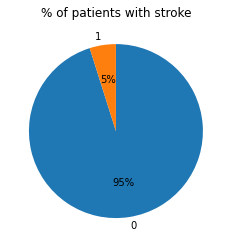

In [15]:
#setting my column unique value count
count = stroke_df['stroke'].value_counts()
#Using matplotlib donught chart
plt.pie(count, labels = count.index,autopct='%.0f%%',startangle = 90,
        counterclock = False);
plt.title('% of patients with stroke');


From this plot 5 patients out of 100 patients have stroke from this sampling.

**Univariate analysis of continuous variables**


There are 3 continous variables; age,bmi and average glucose level

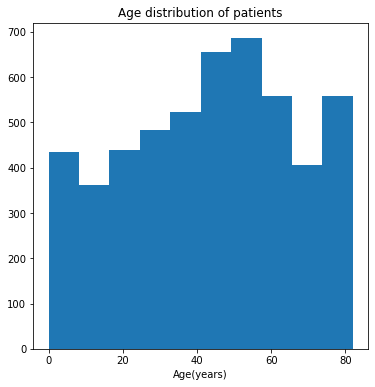

In [16]:
#setting figure size
plt.figure(figsize =[6,6])
plt.hist(data=stroke_df, x='age',bins=10);
#setting the title and axis
plt.title('Age distribution of patients')
plt.xlabel('Age(years)')
plt.show()

*  This is a unimodal distribution with peaks at around 50. 

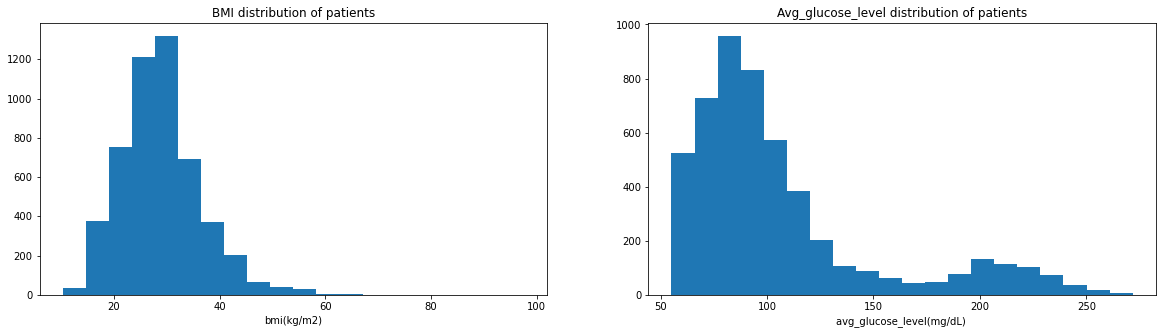

In [17]:
#using a standard scaled Hist plot and subplot
plt.figure(figsize = [20,5])

#For the first plot
plt.subplot(1, 2, 1)
plt.hist(data=stroke_df,x='bmi', bins=20)
plt.xlabel('bmi(kg/m2)')
plt.title('BMI distribution of patients')

#For the second plot
plt.subplot(1, 2, 2)
plt.hist(data=stroke_df,x='avg_glucose_level',bins= 20)
plt.xlabel('avg_glucose_level(mg/dL) ')
plt.title('Avg_glucose_level distribution of patients');

* The bmi plot has a unimodal distribution, there is a spike around 30kg/m2. It ia also observed that there are outliers in the dataset particularly from 60.
* For the glucose level , the plot has a unimodal distribution and it is highly skewed to the right with majority of the patients having controlled glucose level, there is a spike around 90mg/dl.

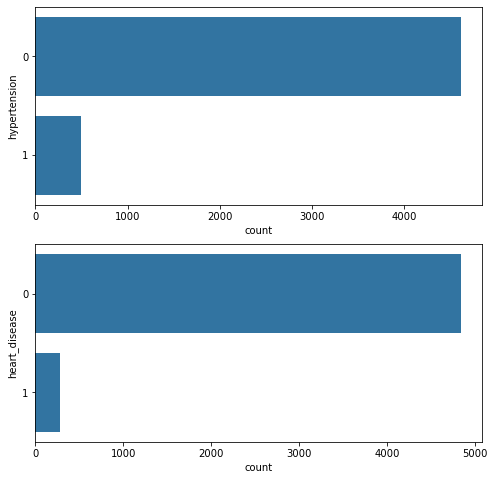

In [18]:
#Using seaborns countplot and subplot
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
#Setting my base color 
base_color = sns.color_palette()[0]
sns.countplot(data = stroke_df,y ='hypertension',color=base_color, ax = ax[0])
sns.countplot(data = stroke_df,y ='heart_disease',color=base_color, ax = ax[1])
plt.show()

* Majority of the patients do not have hypertension and heart disease and these are 2 top risk factors of stroke, their relationship with stroke will be explored later on.

**Univariate analysis of categorical variables**

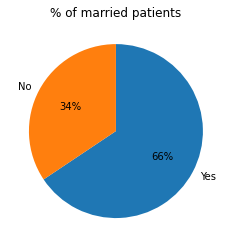

In [19]:
#setting my column unique value count
count = stroke_df['ever_married'].value_counts()
#Using matplotlib donught chart
plt.pie(count, labels = count.index,autopct='%.0f%%',startangle = 90,
        counterclock = False);
plt.title('% of married patients');


* 66% of the patients in this sample are married , later on we will look at the effect it has on stroke.

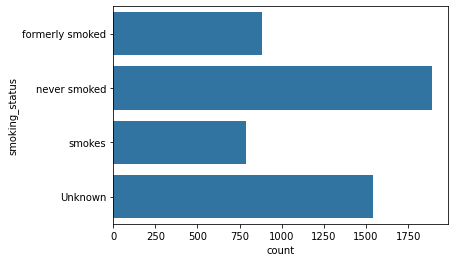

In [20]:
#using seaborns countplot
sns.countplot(data = stroke_df,y ='smoking_status',color=base_color)
plt.show()

* We can see that 37% of the patients never smoked and there are more former smokers than recent smokers.

**Bivariate analysis**

Here I'll be investigating the relationship between 2 variables

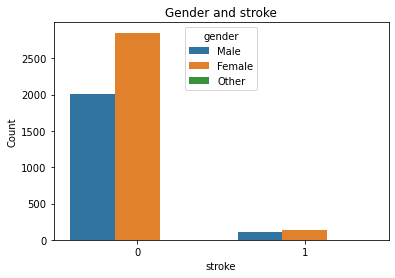

In [21]:
#using seaborns countplot 
sns.countplot(data = stroke_df,x='stroke',hue='gender')
#setting axis labels
plt.title('Gender and stroke')
plt.xlabel('stroke')
plt.ylabel('Count');

This plot shows that female gender have more stroke patients than the female gender, but is this true though, because count plot ignores the real picture.

In [17]:
#getting the percentage of healthy and stroke patients
stroke_gen = stroke_df[stroke_df['stroke'] == 1]['gender'].value_counts()
healthy_gen = stroke_df[stroke_df['stroke'] == 0]['gender'].value_counts()

#getting the male and female gender count
female = stroke_df['gender'].value_counts().values[0]
male =  stroke_df['gender'].value_counts().values[1]

#getting the percentage of healthy male & female and stroke male & female patients
stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

print("%female patients with stroke:",stroke_female,"%")
print("%male patients with stroke:",stroke_male,"%")
print("%female patients without stroke:",healthy_female,"%")
print("%male patients without stroke:",healthy_male,"%")


%female patients with stroke: 5 %
%male patients with stroke: 5 %
%female patients without stroke: 95 %
%male patients without stroke: 95 %


From this we can see that the risk of stroke in male and female are same.

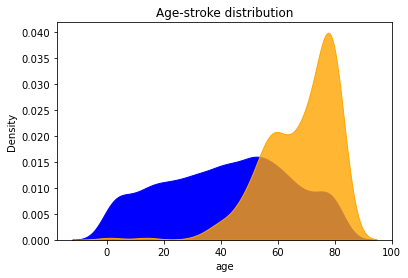

In [22]:
#binning age into categorical variable
stroke_df['age_cat'] = pd.cut(stroke_df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

#getting count of healthy & stroke age
stroke_age = stroke_df[stroke_df['stroke'] == 1].age_cat.value_counts()
healthy_age = stroke_df[stroke_df['stroke'] == 0].age_cat.value_counts()

# distribution plots with hue of strokes
sns.kdeplot(data = stroke_df[stroke_df['stroke'] == 0], x = 'age', shade = True,  alpha = 1, color = 'blue' ).set(title= "Age-stroke distribution")
sns.kdeplot(data = stroke_df[stroke_df['stroke'] == 1], x = 'age', shade = True,  alpha = 0.8, color = 'orange');


From the above plot it can be seen that age is an important feature, old aged patients mostly have stroke compared to the younger ones.

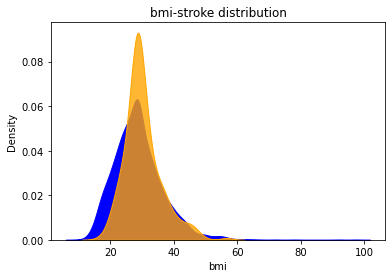

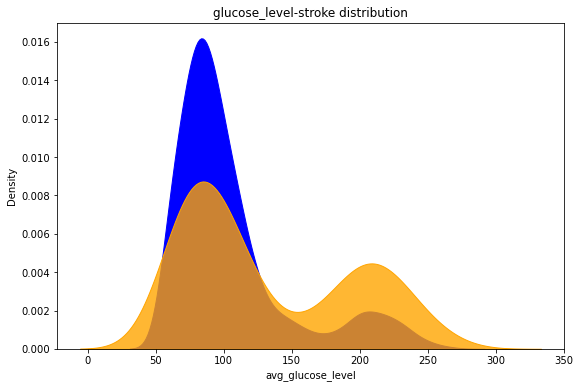

In [23]:
#bmi and glucose level binning
stroke_df['bmi_cat'] = pd.cut(stroke_df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
stroke_df['glucose_cat'] = pd.cut(stroke_df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

#getting count of healthy & stroke bmi
stroke_bmi = stroke_df[stroke_df['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = stroke_df[stroke_df['stroke'] == 0].bmi_cat.value_counts()

# distribution plots with hue of strokes
sns.kdeplot(data = stroke_df[stroke_df['stroke'] == 0], x = 'bmi', shade = True,  alpha = 1, color = 'blue' ).set(title= "bmi-stroke distribution")
sns.kdeplot(data = stroke_df[stroke_df['stroke'] == 1], x = 'bmi', shade = True,  alpha = 0.8, color = 'orange');

#using a standard scaled Hist plot and subplot
plt.figure(figsize = [20,6])

#For the first plot
plt.subplot(1, 2, 1)

#getting count of healthy & stroke glucose level
stroke_glucose_level = stroke_df[stroke_df['stroke'] == 1].glucose_cat.value_counts()
healthy_glucose_level = stroke_df[stroke_df['stroke'] == 0].glucose_cat.value_counts()
# distribution plots with hue of strokes
sns.kdeplot(data = stroke_df[stroke_df['stroke'] == 0], x = 'avg_glucose_level', shade = True,  alpha = 1, color = 'blue' ).set(title= "glucose_level-stroke distribution")
sns.kdeplot(data = stroke_df[stroke_df['stroke'] == 1], x = 'avg_glucose_level', shade = True,  alpha = 0.8, color = 'orange');


* From this distribution it can be seen that stroke is more among patients with low - normal glucose level.
* From the bmi-stroke distribution it shows that people with higer bmi are at the higher risk of getting stroke, now let's get the relationship between bmi and glocose level.

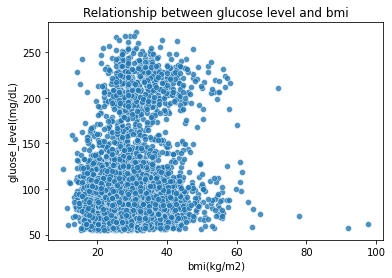

In [24]:
#plotting scatter plot
sns.scatterplot(data=stroke_df, x="bmi", y="avg_glucose_level",alpha=0.8)
plt.xlabel('bmi(kg/m2)')
plt.ylabel('gluose_level(mg/dL)')
plt.title('Relationship between glucose level and bmi')
plt.show();

From the plot we can see that there is no correlation between glucose level and bmi.

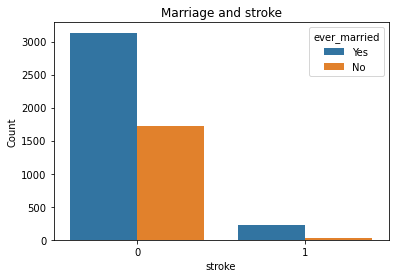

In [25]:
#using seaborns countplot 
sns.countplot(data = stroke_df,x='stroke',hue='ever_married')
#setting axis labels
plt.title('Marriage and stroke')
plt.xlabel('stroke')
plt.ylabel('Count');

* From the above plot, it can be seen that married patients are more with stroke than the unmarried patients.

In [22]:
#getting the percentage of healthy and stroke patients
stroke_mar = stroke_df[stroke_df['stroke'] == 1]['ever_married'].value_counts()
healthy_mar = stroke_df[stroke_df['stroke'] == 0]['ever_married'].value_counts()

#getting the married & unmarried count
Yes = stroke_df['ever_married'].value_counts().values[0]
No =  stroke_df['ever_married'].value_counts().values[1]

#getting the percentage of healthy married & unmarried and stroke married & unmarried patients
stroke_yes = int(round (stroke_mar.values[0] / Yes * 100, 0))
stroke_no = int(round( stroke_mar.values[1] / No *100, 0))
healthy_yes = int(round(healthy_mar.values[0] / Yes * 100, 0))
healthy_no = int(round(healthy_mar.values[1] /No *100, 0))

print("%unmarried patients with stroke:",stroke_no,"%")
print("%married patients with stroke:",stroke_yes,"%")
print("%unmarried patients without stroke:",healthy_no,"%")
print("%married patients without stroke:",healthy_yes,"%")


%unmarried patients with stroke: 2 %
%married patients with stroke: 7 %
%unmarried patients without stroke: 98 %
%married patients without stroke: 93 %


* The risk of stroke in married people is relatively high, with a margin of 5%.

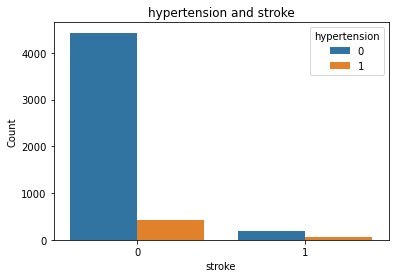

In [26]:
#using seaborns countplot 
sns.countplot(data = stroke_df,x='stroke',hue='hypertension')
#setting axis labels
plt.title('hypertension and stroke')
plt.xlabel('stroke')
plt.ylabel('Count');

This plot shows that patients without hypertension have more stroke patients than those without, but is this true though, because count plot ignores the real picture.

In [27]:
stroke_hyper = stroke_df[stroke_df['stroke'] == 1]['hypertension'].value_counts()
healthy_hyper = stroke_df[stroke_df['stroke'] == 0]['hypertension'].value_counts()

#getting the patients with & withot hypertention count
no = stroke_df['hypertension'].value_counts().values[0]
yes =  stroke_df['hypertension'].value_counts().values[1]

#getting the percentage of stroke & healthy patients
stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hyper.values[1] /yes *100, 0))

print("%patients with hypertension and stroke:",stroke_yes,"%")
print("%patients without hypertension with stroke:",stroke_no,"%")
print("%hypertensive patients without stroke:",healthy_yes,"%")
print("%without hypertension & stroke:",healthy_no,"%")


%patients with hypertension and stroke: 13 %
%patients without hypertension with stroke: 4 %
%hypertensive patients without stroke: 87 %
%without hypertension & stroke: 96 %


* Risk of stroke for people with hypertension is very high, almost 9% more people have stroke when they are hypertensive.

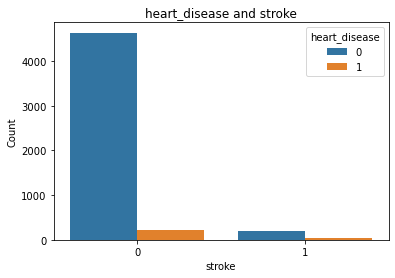

In [28]:
#using seaborns countplot 
sns.countplot(data = stroke_df,x='stroke',hue='heart_disease')
#setting axis labels
plt.title('heart_disease and stroke')
plt.xlabel('stroke')
plt.ylabel('Count');

This plot shows that patients without heart disease have more stroke patients than those without, but is this true though, because count plot ignores the real picture.

In [29]:
stroke_heart = stroke_df[stroke_df['stroke'] == 1]['heart_disease'].value_counts()
healthy_heart = stroke_df[stroke_df['stroke'] == 0]['heart_disease'].value_counts()

#getting the patients with & withot heart disease count
no = stroke_df['heart_disease'].value_counts().values[0]
yes =  stroke_df['heart_disease'].value_counts().values[1]

#getting the percentage of stroke & healthy patients
stroke_no = int(round (stroke_heart.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_heart.values[1] / yes *100, 0))
healthy_no = int(round(healthy_heart.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_heart.values[1] /yes *100, 0))

print("%patients with heart disease and stroke:",stroke_yes,"%")
print("%patients without heart disease, with stroke:",stroke_no,"%")
print("%patients with heart disease, without stroke:",healthy_yes,"%")
print("%without heart disease & stroke:",healthy_no,"%")


%patients with heart disease and stroke: 17 %
%patients without heart disease, with stroke: 4 %
%patients with heart disease, without stroke: 83 %
%without heart disease & stroke: 96 %


* Risk of stroke is higher with patients with heart disease, almost 13% more people have stroke when they have a heart disease.

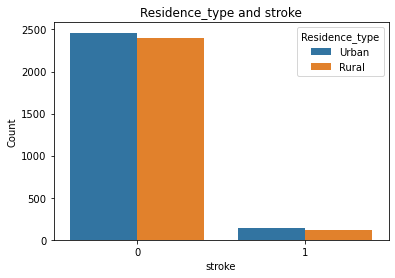

In [30]:
#using seaborns countplot 
sns.countplot(data = stroke_df,x='stroke',hue='Residence_type')
#setting axis labels
plt.title('Residence_type and stroke')
plt.xlabel('stroke')
plt.ylabel('Count');

This plot shows that patients that stays in the urban areas have more stroke patients than those in the rural areas, but is this true though, because count plot ignores the real picture.

In [31]:
stroke_residence = stroke_df[stroke_df['stroke'] == 1]['Residence_type'].value_counts()
healthy_residence = stroke_df[stroke_df['stroke'] == 0]['Residence_type'].value_counts()

#getting the patients resisdence type count
urban = stroke_df['Residence_type'].value_counts().values[0]
rural =  stroke_df['Residence_type'].value_counts().values[1]

#getting the percentage of stroke & healthy patients
stroke_urban = int(round (stroke_residence.values[0] / urban * 100, 0))
stroke_rural = int(round( stroke_residence.values[1] / rural *100, 0))
healthy_urban = int(round(healthy_residence.values[0] / urban * 100, 0))
healthy_rural = int(round(healthy_residence.values[1] /rural *100, 0))

print("%patients in urban area and have stroke:",stroke_urban,"%")
print("%patients in rural area and have stroke:",stroke_rural,"%")
print("%patients in urban area without stroke:",healthy_urban,"%")
print("%without in rural area without stroke:",healthy_rural,"%")

%patients in urban area and have stroke: 5 %
%patients in rural area and have stroke: 5 %
%patients in urban area without stroke: 95 %
%without in rural area without stroke: 95 %


The location of patients home has no effect on stroke, both patients staying in urban and rural areas have equal pssibilities of having stroke.

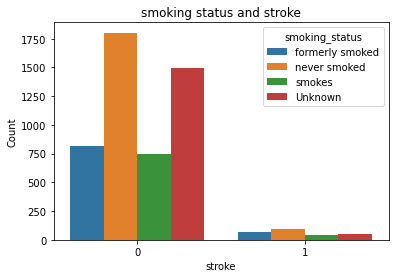

In [32]:
#using seaborns countplot 
sns.countplot(data = stroke_df,x='stroke',hue='smoking_status')
#setting axis labels
plt.title('smoking status and stroke')
plt.xlabel('stroke')
plt.ylabel('Count');

This plot shows that patients that never smokes have more stroke patients than patients that smokes, but is this true though, because count plot ignores the real picture.

In [33]:
stroke_smoke = stroke_df[stroke_df['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = stroke_df[stroke_df['stroke'] == 0]['smoking_status'].value_counts()

#getting the smoke status count
never = stroke_df['smoking_status'].value_counts().values[0]
unknown =  stroke_df['smoking_status'].value_counts().values[1]
former = stroke_df['smoking_status'].value_counts().values[2]
smokes = stroke_df['smoking_status'].value_counts().values[3]

#getting the percentage of stroke patients
stroke_never = int(round (stroke_smoke.values[0] / never * 100, 0))
stroke_unknown = int(round( stroke_smoke.values[2]  / unknown *100, 0))
stroke_former = int(round (stroke_smoke.values[1]  / former * 100, 0))
stroke_smokes = int(round( stroke_smoke.values[3]  / smokes *100, 0))

#getting the percentage of healthy patients
healthy_never = int(round(healthy_smoke.values[0] / never * 100, 0))
healthy_unknown = int(round(healthy_smoke.values[1] / unknown *100, 0))
healthy_former = int(round(healthy_smoke.values[2] / former * 100, 0))
healthy_smokes = int(round(healthy_smoke.values[3]/ smokes *100, 0))

print("% stroke_never smokes: ", stroke_never,"%")
print("% stroke_unknown: ", stroke_unknown,"%")
print("% stroke_formerly smokes: ", stroke_former,"%")
print("% stroke_smokes: ", stroke_smokes,"%")
print("% healthy_never smokes: ", healthy_never,"%")
print("% healthy_unknown: ", healthy_unknown,"%")
print("% healthy_formerly smokes: ", healthy_former,"%")
print("% healthy_smokes: ", healthy_smokes,"%")

% stroke_never smokes:  5 %
% stroke_unknown:  3 %
% stroke_formerly smokes:  8 %
% stroke_smokes:  5 %
% healthy_never smokes:  95 %
% healthy_unknown:  97 %
% healthy_formerly smokes:  92 %
% healthy_smokes:  95 %


From this ,it shows that smoking does not really have any effect on stroke and former smokers are most likely to get stroke.

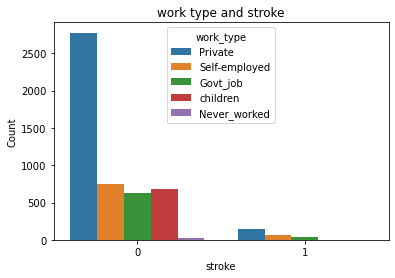

In [34]:
#using seaborns countplot 
sns.countplot(data = stroke_df,x='stroke',hue='work_type')
#setting axis labels
plt.title('work type and stroke')
plt.xlabel('stroke')
plt.ylabel('Count');

This plot shows that private workers have more stroke patients than other workers, but is this true though, because count plot ignores the real picture.

In [35]:
stroke_work = stroke_df[stroke_df['stroke'] == 1]['work_type'].value_counts()
healthy_work = stroke_df[stroke_df['stroke'] == 0]['work_type'].value_counts()

#getting the work type count
private = stroke_df['work_type'].value_counts().values[0]
self =  stroke_df['work_type'].value_counts().values[1]
child = stroke_df['work_type'].value_counts().values[2]
gov = stroke_df['work_type'].value_counts().values[3]
never = stroke_df['work_type'].value_counts().values[4]

#getting the percentage of stroke patients
stroke_private = int(round (stroke_work.values[0] / private * 100, 0))
stroke_self = int(round( stroke_work.values[1]  / self *100, 0))
stroke_child = int(round (stroke_work.values[2]  / child * 100, 0))
stroke_gov = int(round( stroke_work.values[3]  / gov *100, 0))
stroke_never = int(round( 0, 0))

#getting the percentage of healthy patients
healthy_private = int(round(healthy_work.values[0] / private * 100, 0))
healthy_self = int(round(healthy_work.values[1] / self *100, 0))
healthy_child = int(round(healthy_work.values[2] / child * 100, 0))
healthy_gov = int(round(healthy_work.values[3]/ gov *100, 0))
healthy_never = int(round(healthy_work.values[4]/ never *100, 0))

print("% stroke_private : ", stroke_private,"%")
print("% stroke_self : ", stroke_self,"%")
print("% stroke_child : ", stroke_child,"%")
print("% stroke_gov: ", stroke_gov,"%")
print("% stroke_never: ", stroke_never,"%")
print("% healthy_private: ", healthy_private,"%")
print("% healthy_self: ", healthy_self,"%")
print("% healthy_child: ", healthy_child,"%")
print("% healthy_gov: ", healthy_gov,"%")
print("% healthy_never: ", healthy_never,"%")

% stroke_private :  5 %
% stroke_self :  8 %
% stroke_child :  5 %
% stroke_gov:  0 %
% stroke_never:  0 %
% healthy_private:  95 %
% healthy_self:  92 %
% healthy_child:  100 %
% healthy_gov:  95 %
% healthy_never:  100 %


From this, it shows that self employed workers have a higher percentage of having stroke.

**Multivariate analysis**

**Relationship between stroke,gender and married status**

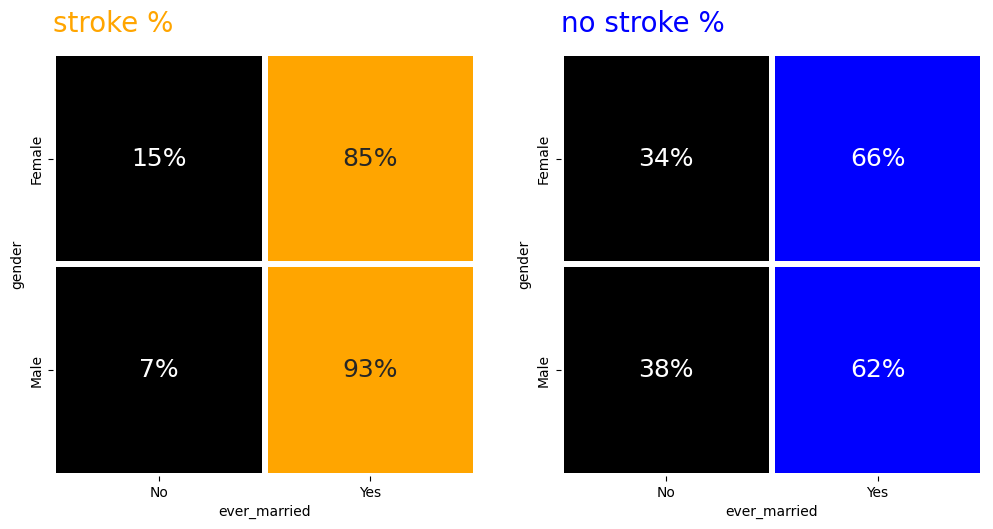

In [36]:
#setting fig size
fig = plt.figure(figsize=(12,6),dpi = 100)
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

no_stroke = stroke_df[stroke_df['stroke']==0]
stroke = stroke_df[stroke_df['stroke']==1]

#setting colour pallete
col1 = ["black","orange"]
col2 =["black","blue"]

stroke = pd.crosstab(stroke['gender'],[stroke['ever_married']],normalize='index')
no_stroke = pd.crosstab(no_stroke['gender'],[no_stroke['ever_married']], normalize='index')

#plotting with seaborn heatmap
sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col1)
sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col2)
#setting label
ax0.text(0,-0.1,'stroke %', {'color':"orange", 'size':20})
ax1.text(0,-0.1,'no stroke %', {'color':"blue", 'size':20})
plt.show()


* From the plot we can see that married people are the most affected by stroke and married male has the highest percentage of stroke patients.

**Relationship between stroke,gender and age**

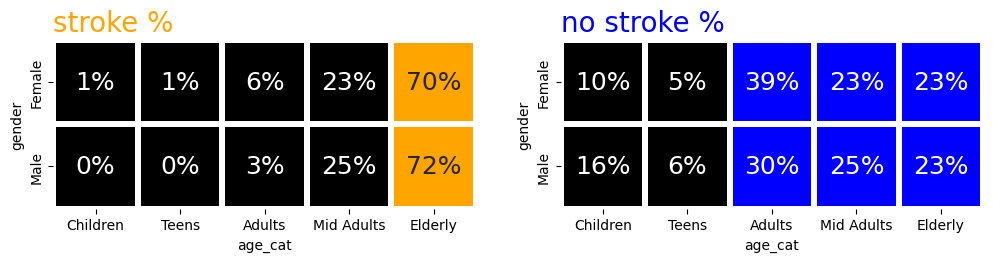

In [37]:
#binning age category
stroke_df['age_cat'] = pd.cut(stroke_df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
#setting fig size
fig = plt.figure(figsize=(12,6),dpi = 100)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

no_stroke = stroke_df[stroke_df['stroke']==0]
stroke = stroke_df[stroke_df['stroke']==1]

#setting colour pallete
col1 = ["black","orange"]
col2 =["black","blue"]

stroke = pd.crosstab(stroke['gender'],[stroke['age_cat']],normalize='index')
no_stroke = pd.crosstab(no_stroke['gender'],[no_stroke['age_cat']], normalize='index')

#plotting with seaborn heatmap
sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col1)
sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col2)
#setting label
ax0.text(0,-0.1,'stroke %', {'color':"orange", 'size':20})
ax1.text(0,-0.1,'no stroke %', {'color':"blue", 'size':20})
plt.show()


* We can see from the plot that irrespective of the gender, elderly people are more affected by stroke.

**Relationship between stroke,gender and age**

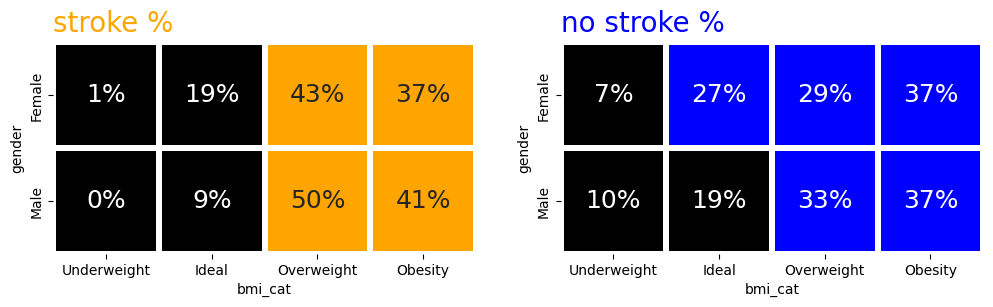

In [38]:
#setting fig size
fig = plt.figure(figsize=(12,6),dpi = 100)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

no_stroke = stroke_df[stroke_df['stroke']==0]
stroke = stroke_df[stroke_df['stroke']==1]

#setting colour pallete
col1 = ["black","orange"]
col2 =["black","blue"]

stroke = pd.crosstab(stroke['gender'],[stroke['bmi_cat']],normalize='index')
no_stroke = pd.crosstab(no_stroke['gender'],[no_stroke['bmi_cat']], normalize='index')

#plotting with seaborn heatmap
sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col1)
sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col2)
#setting label
ax0.text(0,-0.1,'stroke %', {'color':"orange", 'size':20})
ax1.text(0,-0.1,'no stroke %', {'color':"blue", 'size':20})
plt.show()

* We can see from the plot that irrespective of the gender, overweight people are more affected by stroke.

**Relationship between stroke,heart disease and hypertension**

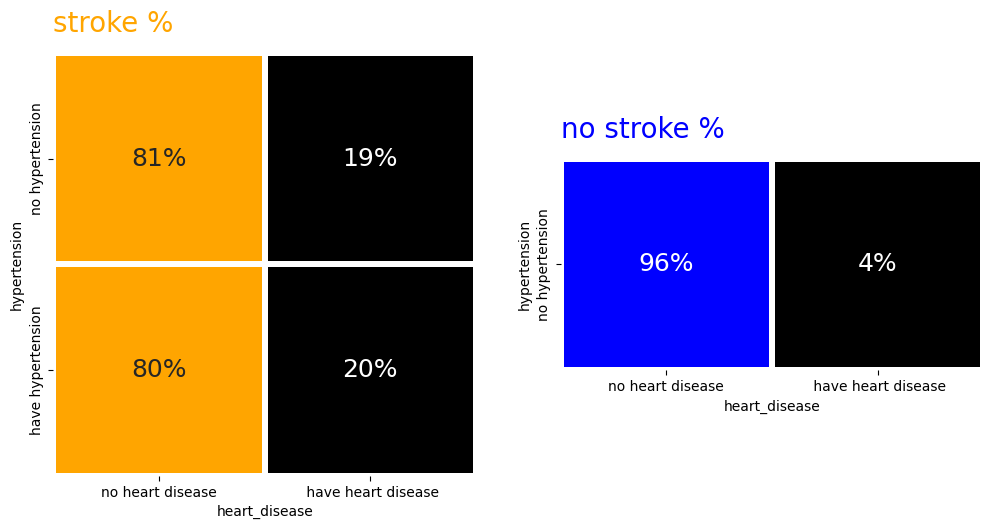

In [36]:
#setting fig size
fig = plt.figure(figsize=(12,6),dpi = 100)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

no_stroke = stroke_df[stroke_df['stroke']==0]
stroke = stroke_df[stroke_df['stroke']==1]

#setting colour pallete
col1 = ["black","orange"]
col2 =["black","blue"]

stroke = pd.crosstab(stroke['hypertension'],[stroke['heart_disease']],normalize='index')
no_stroke = pd.crosstab(no_stroke['hypertension'],[no_stroke['heart_disease']], normalize='index')

#plotting with seaborn heatmap
sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col1)
sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":18}, alpha = 1,cmap = col2)


## Ticket labels
ax0.xaxis.set_ticklabels(['no heart disease',' have heart disease'])
ax0.yaxis.set_ticklabels(['no hypertension','have hypertension'])
ax1.xaxis.set_ticklabels(['no heart disease',' have heart disease'])
ax1.yaxis.set_ticklabels(['no hypertension'])



#setting label
ax0.text(0,-0.1,'stroke %', {'color':"orange", 'size':20})
ax1.text(0,-0.1,'no stroke %', {'color':"blue", 'size':20})
plt.show()

We can see here that patients with hypertension and no heart disease have the most stroke.

## Conclusion

* From the distribution gender is not a high determinant of stroke, both male and female gender have equal chances of getting stroke.
* Married people have a higher risk of getting stroke.
* Patients that are 60 years and above have a higer risk of getting stroke.
* A high distribution of the patients have a normal glucose level of 90mg/dL.
* Patients with bmi of 25kg/m2 and above have a higher risk of getting stroke
* Percentage of patients with hypertension & stroke and patients with heart disease & stroke is higher in the distribution, but patients with hypertension and no heart disease have a higher risk of getting stroke from the dataset.